Question 26. Sample the following signals x(t) sample at a nyquist rate and then at the next higher rate for which fs/f0 is an integer.

$x(t) = 2 \sin(\pi t) + 5 \cos(18 \pi t)$
<br>
$x(t) = 6 \sin(6 \pi t) \cos(24 \pi t)$

first start with the imports.

In [302]:
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.fftpack import fftshift
import numpy as np

In [303]:
%matplotlib inline

Now do the signals

In [304]:
a = lambda t: 2*np.sin(30*np.pi*t) + 5*np.cos(18*np.pi*t)
b = lambda t: 6*np.sin(6*np.pi*t)*np.cos(24*np.pi*t)

Lambda expressions are neat<br>
it basically says "a is a function that takes a single argument t, and applys this procedure to t.<br>
you can treat the signal more naturally. for example, you have an array t. you can simply apply the procedure a to t by a(t)

now the consts

In [305]:
m = 5000
f1 = 15
f2 = 9
f0 = 3
T0 = 1/f0
tmax = 10*T0
freq = np.linspace(-m/2,m/2,m)
t = np.linspace(-T0,T0,m)

now plot the first one

In [306]:
#this is how sausage gets made
def plotty(signal_list, domain_list, title_list, type_of_plot, range_of_domain = None,):
    fig,axs = plt.subplots(len(signal_list),figsize = (15,15))
    for i,ax in enumerate(axs):
        if type_of_plot == 'Time':
            axs[i].plot(domain,signal_list[i],label = title_list[i])
        else:
            axs[i].stem(domain,signal_list[i],label = title_list[i],use_line_collection = True)
            if range_of_domain != None:
                axs[i].set_xlim(range_of_domain[0],range_of_domain[1])
        axs[i].grid()
        axs[i].axhline(0,color='black')
        axs[i].axvline(0,color='black')
        axs[i].set_xlabel(type_of_plot)
        axs[i].legend(loc='upper right')
    plt.show()

I know this is a hairy function just for plotting. please note it is possible to get a very simple plot by simply plt.plot(t,a(t)) but I wanted it to look a bit nicer and this way i can plot multiple functions at once and simply call the function whenever i need to plot something

In [307]:
funcs = [a(t),b(t)]
labels = ['$a(t) = 2 \sin(30 \pi t) + 5 \cos(18 \pi t)$','b(t) = $6\sin(6 \pi t) cos(24 \pi t)$']
domain = t

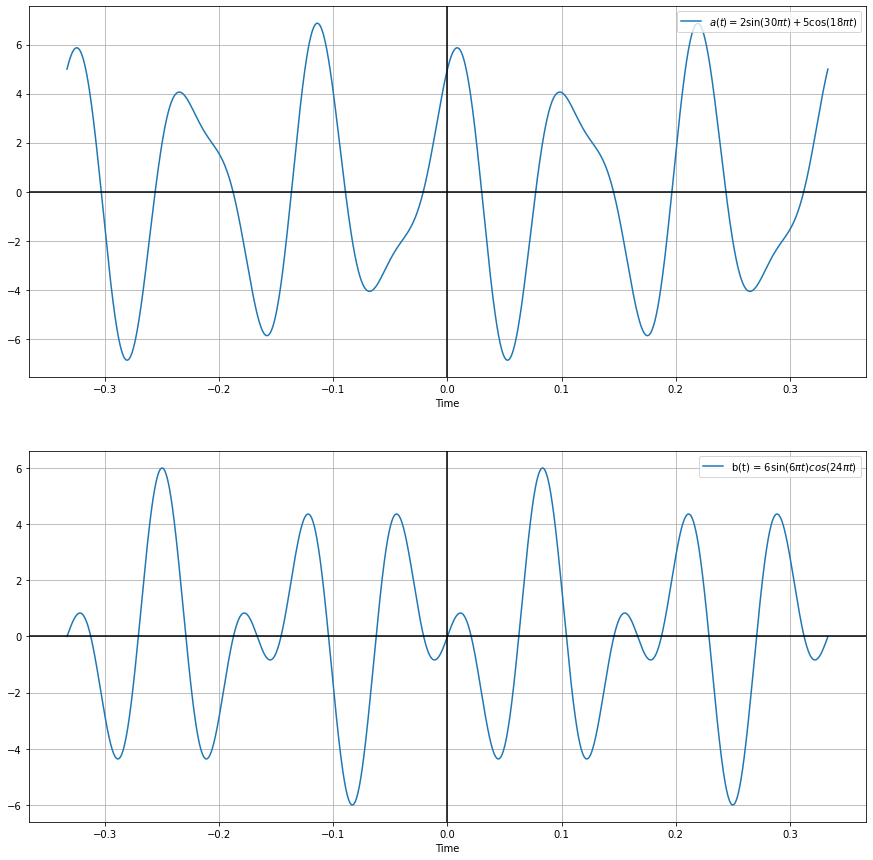

In [308]:
plotty(funcs,domain,labels,'Time')

Now lets get the "ctft"

In [309]:
def ctft(signal):
    signal_fft = fft(signal)
    ctft = abs(fftshift(signal_fft))
    return ctft

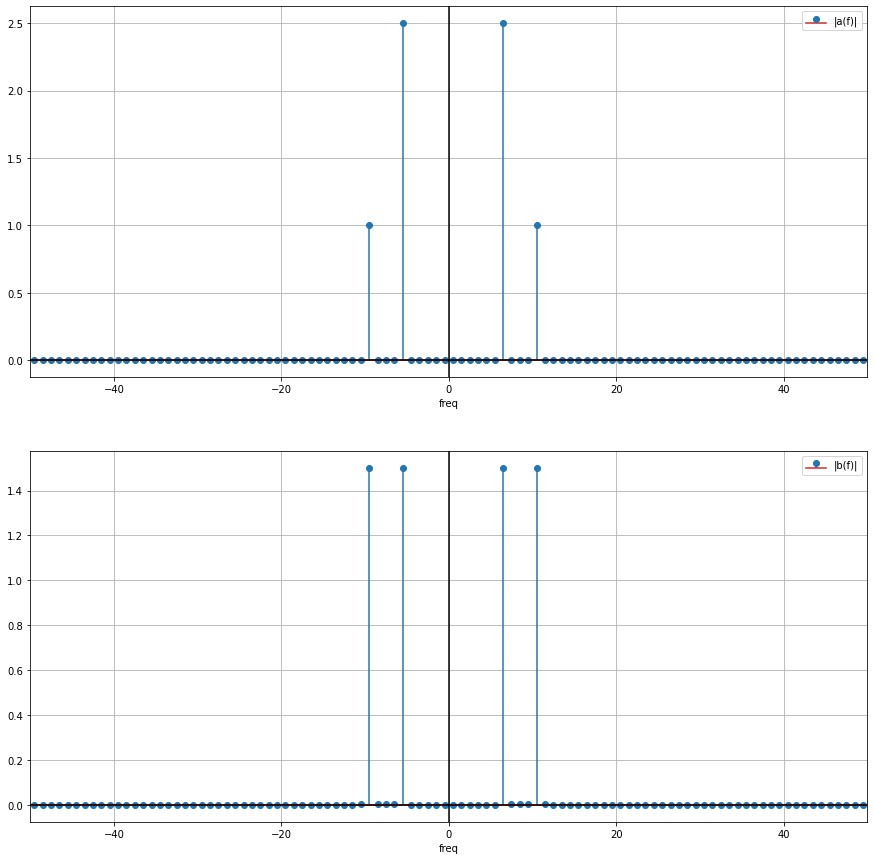

In [310]:
funcs_continuous = [ctft(a(t)) / m, ctft(b(t)) / m]
labels_continuous = ['|a(f)|','|b(f)|']
domain = freq
plotty(funcs_continuous,domain,labels_continuous,'freq',[-50,50])

sampled at nyquist

In [311]:
def sample (sampling_rate, fundemental_freq,interval = None,not_nyquist = None):
    if not_nyquist != None:
        Fn = sampling_rate
    else:
        Fn = 2*sampling_rate
    Ts = 1/Fn
    N = Fn/fundemental_freq
    if interval != None:
        n = np.arange(0,N)
    else:
        n = np.arange(-N,N+1)
    return n,Ts,N

now what makes lambda expression really neat is that you can pass functions as an argument to the procedure. for example below, the * function is being passed to the lambda expression. This is a more natural way of expressing signals be cause intuitivly we know that we are not changing the signal when we sample we are just taking certain points. the signal is unchanged, we are just passing our samples to it.

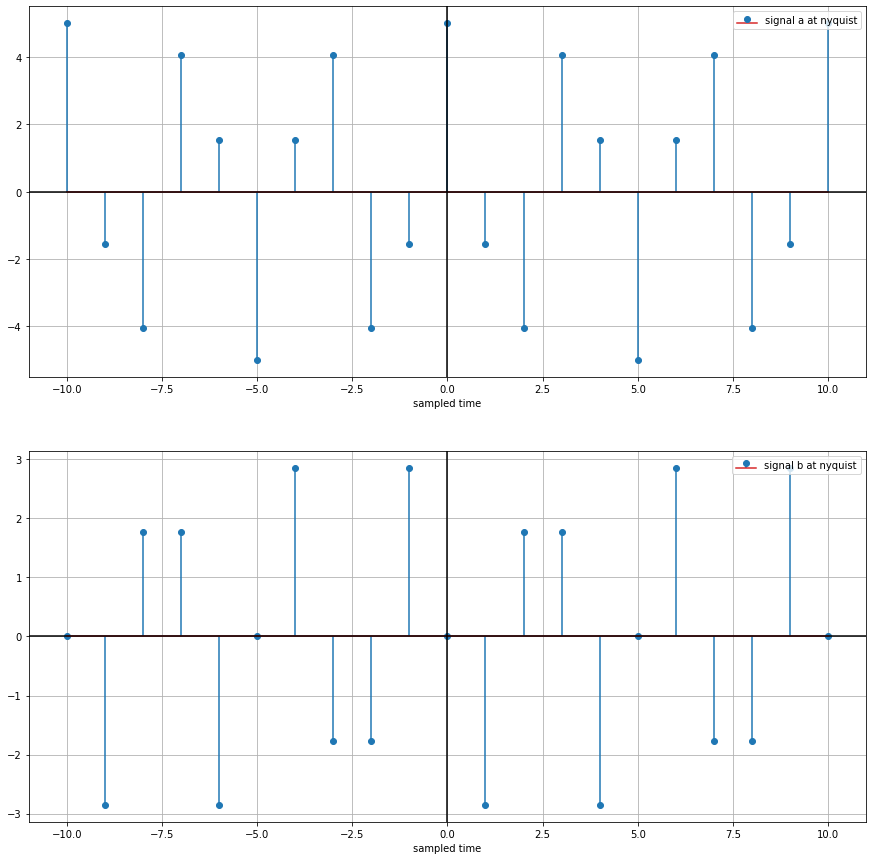

In [312]:
sample_rate = sample(f1,f0)

funcs = [a(sample_rate[0] * sample_rate[1]), b(sample_rate[0] * sample_rate[1])]
labels = ['signal a at nyquist','signal b at nyquist']
domain = sample_rate[0]
plotty(funcs,domain,labels,'sampled time')

In [313]:
sample_dtft = sample(f1,f0,'dtft')

In [314]:
def dtft(signal,number_of_samples):
    signal_fft=fft(signal)
    absolute_signal = abs(signal_fft) / number_of_samples
    flip = np.flip(absolute_signal)
    dtft = np.append(absolute_signal,flip)
    F = np.linspace(-1,1,len(dtft))
    
    return dtft,F

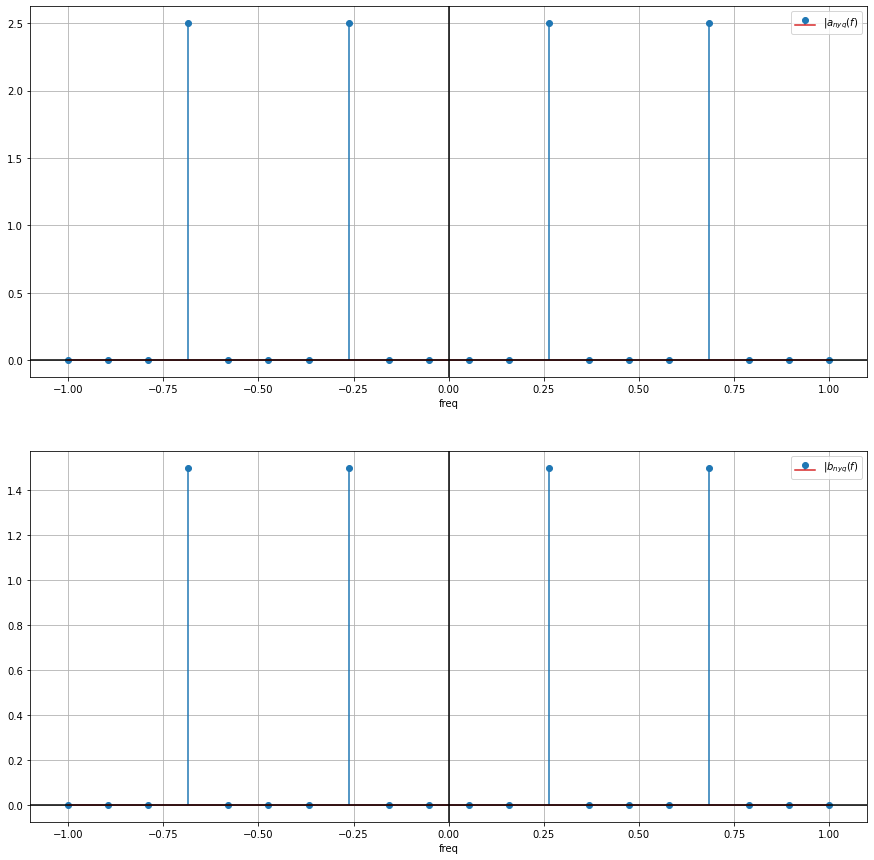

In [315]:
dtft_sample_a = a(sample_dtft[0] * sample_dtft[1])
dtft_a = dtft(dtft_sample_a,sample_dtft[2])


dtft_sample_b = b(sample_dtft[0] * sample_dtft[1])
dtft_b = dtft(dtft_sample_b,sample_dtft[2])

funcs = [dtft_a[0],dtft_b[0]]
domain = dtft_b[1]
labels = ['$|a_{nyq}(f)$','$|b_{nyq}(f)$']
plotty(funcs,domain,labels,'freq')


next higher sampling freq

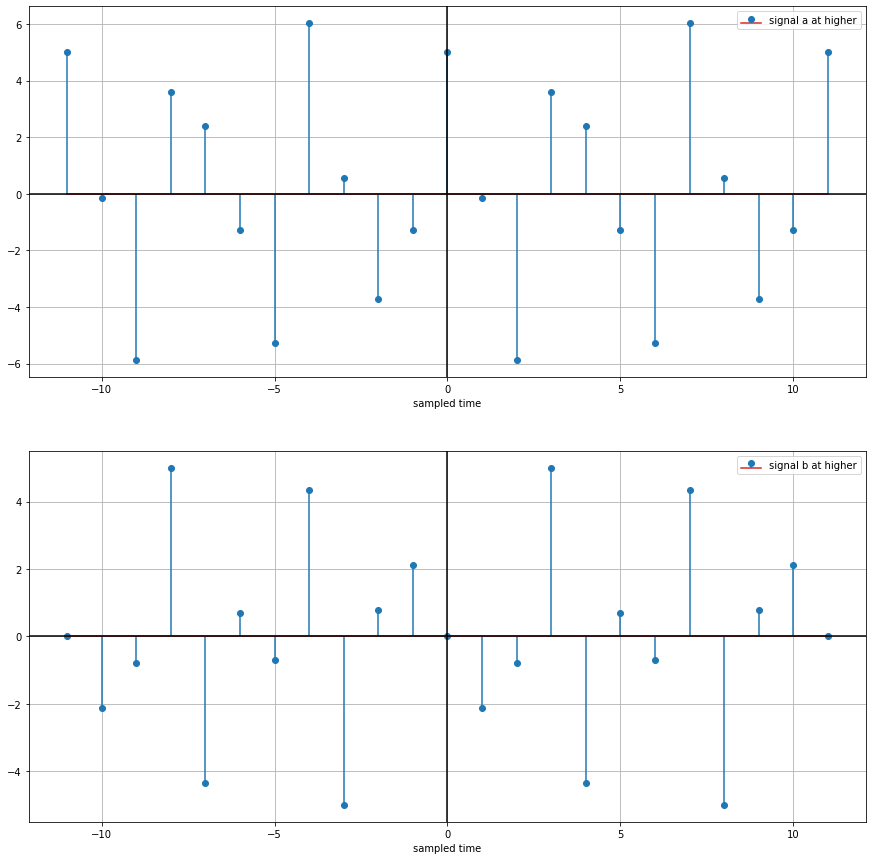

In [316]:
fs = 33
sample_rate_higher = sample(fs,f0,interval = None, not_nyquist = True)

funcs = [a(sample_rate_higher[0] * sample_rate_higher[1]), b(sample_rate_higher[0] * sample_rate_higher[1])]
labels = ['signal a at higher','signal b at higher']
domain = sample_rate_higher[0]
plotty(funcs,domain,labels,'sampled time')

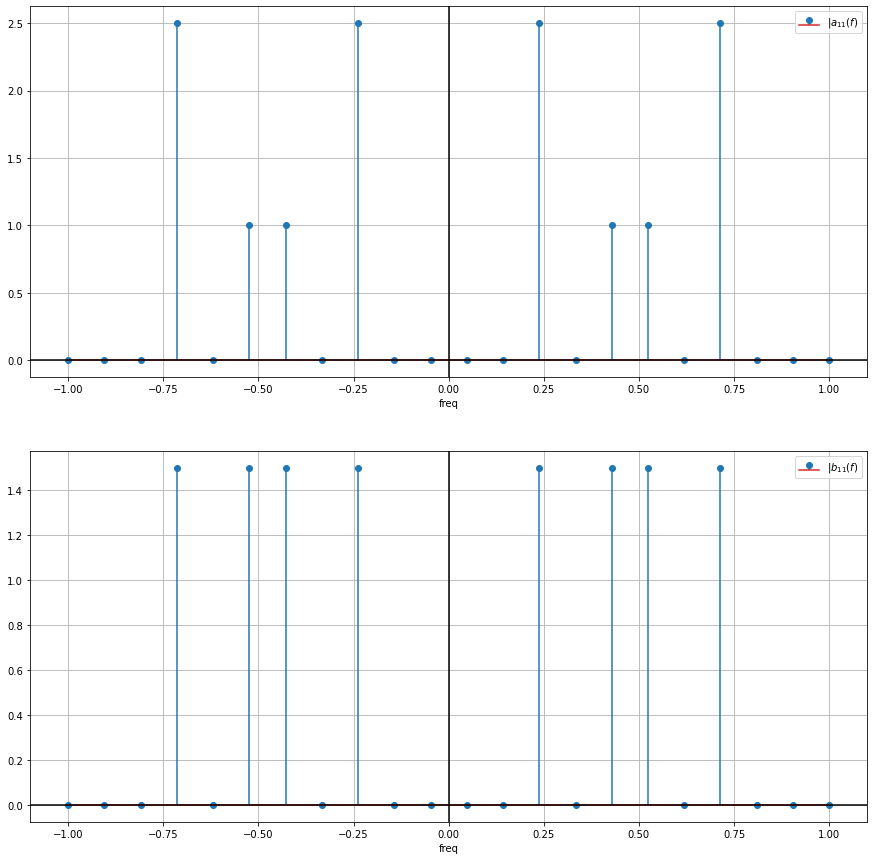

In [317]:
sample_dtft_higher = sample(fs,f0,interval = 'dtft', not_nyquist = True)

dtft_sample_a_higher = a(sample_dtft_higher[0] * sample_dtft_higher[1])
dtft_a_higher = dtft(dtft_sample_a_higher,sample_dtft_higher[2])


dtft_sample_b_higher = b(sample_dtft_higher[0] * sample_dtft_higher[1])
dtft_b_higher = dtft(dtft_sample_b_higher,sample_dtft_higher[2])

funcs = [dtft_a_higher[0],dtft_b_higher[0]]
domain = dtft_b_higher[1]
labels = ['$|a_{11}(f)$','$|b_{11}(f)$']
plotty(funcs,domain,labels,'freq')


In [318]:
import os

os.system('jupyter nbconvert --to html homework.ipynb')

0